
getting state GeoDataFrame
Sucessfully loaded state GeoDataFrame
getting state partition
generating map
Map with Polsby-Popper metric 0.2068525666415361 found: 
Population in each district:
District
0    713385
1    711545
2    714885
3    711325
4    715295
5    714725
6    713075
Name: C_TOT22, dtype: int32


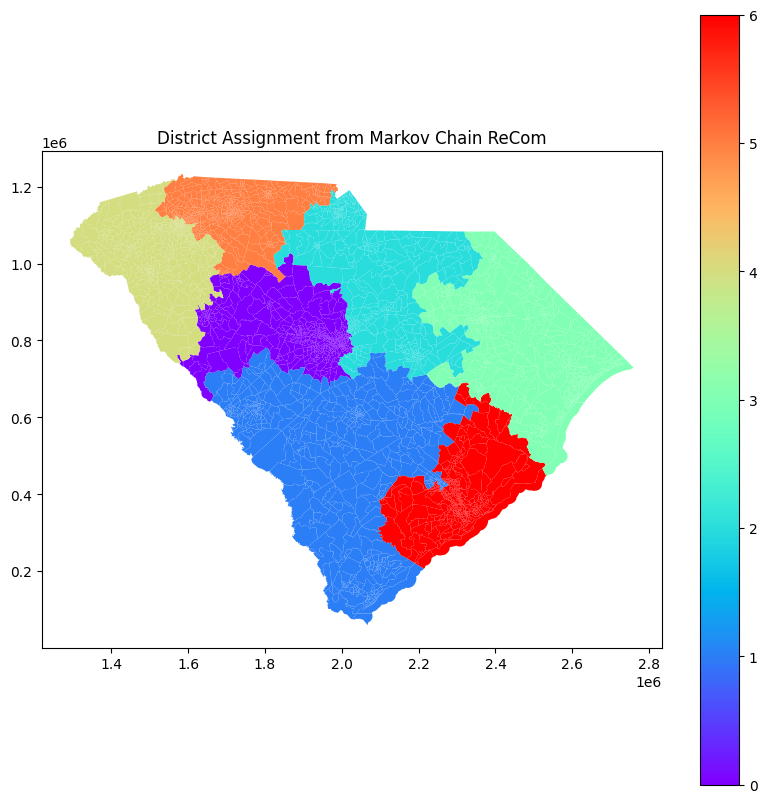

Map with Polsby-Popper metric 0.22440452006711395 found: 
Population in each district:
District
0    712600
1    712510
2    715595
3    713260
4    711645
5    714640
6    713985
Name: C_TOT22, dtype: int32


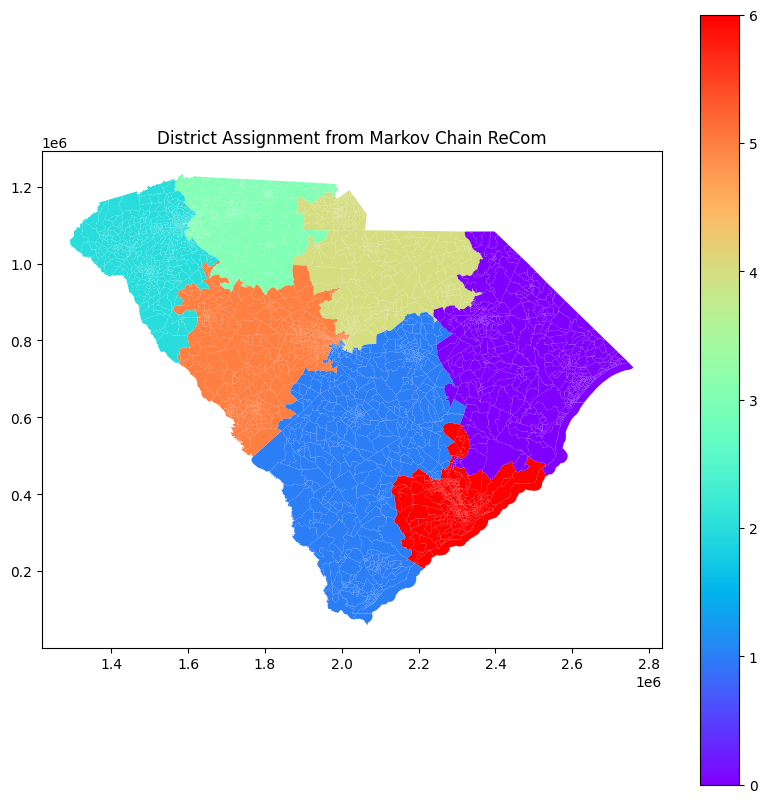

Map with Polsby-Popper metric 0.21946362464737418 found: 
Population in each district:
District
0    712600
1    711525
2    715595
3    713260
4    712630
5    714640
6    713985
Name: C_TOT22, dtype: int32


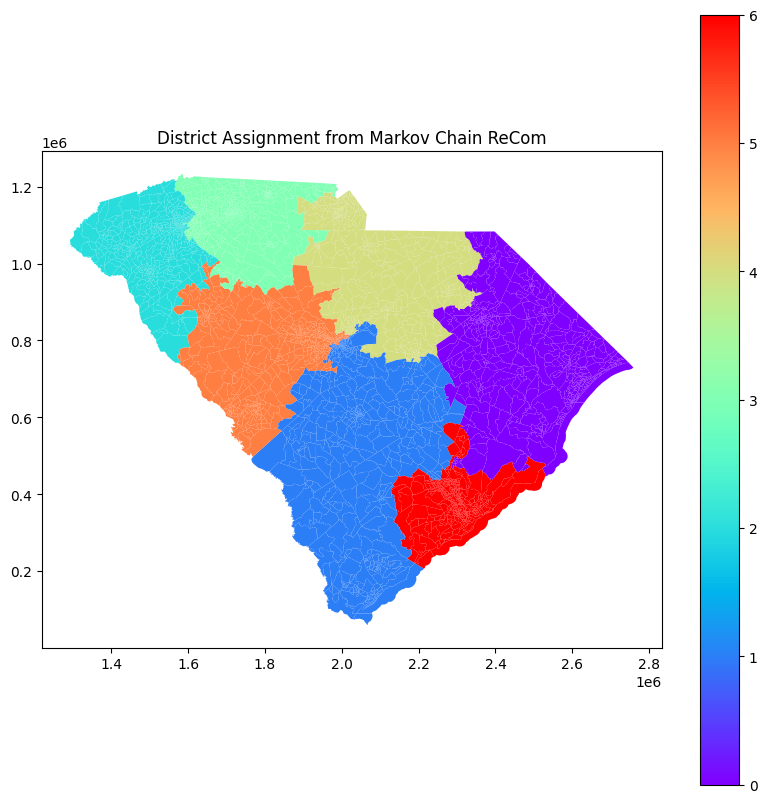

Dissolving maps...
Maps dissolved.
Saving maps to my_districts...
Maps saved.
getting state partition
generating map
Map with Polsby-Popper metric 0.1965100843725611 found: 
Population in each district:
District
0    715160
1    712240
2    711700
3    712340
4    714035
5    714410
6    714350
Name: C_TOT22, dtype: int32


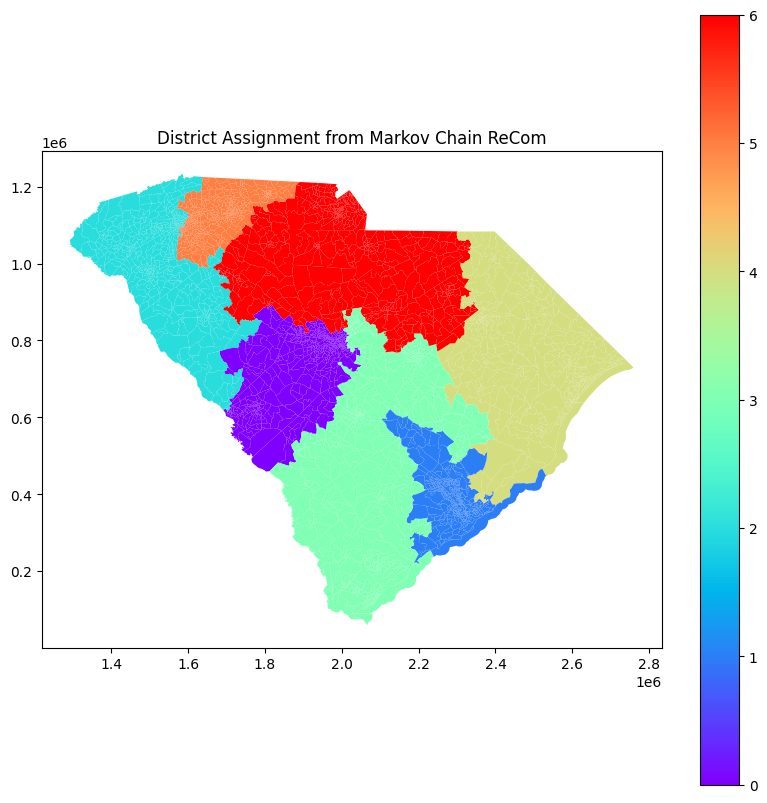

Map with Polsby-Popper metric 0.2025136656309514 found: 
Population in each district:
District
0    714235
1    712190
2    712625
3    712390
4    714035
5    714410
6    714350
Name: C_TOT22, dtype: int32


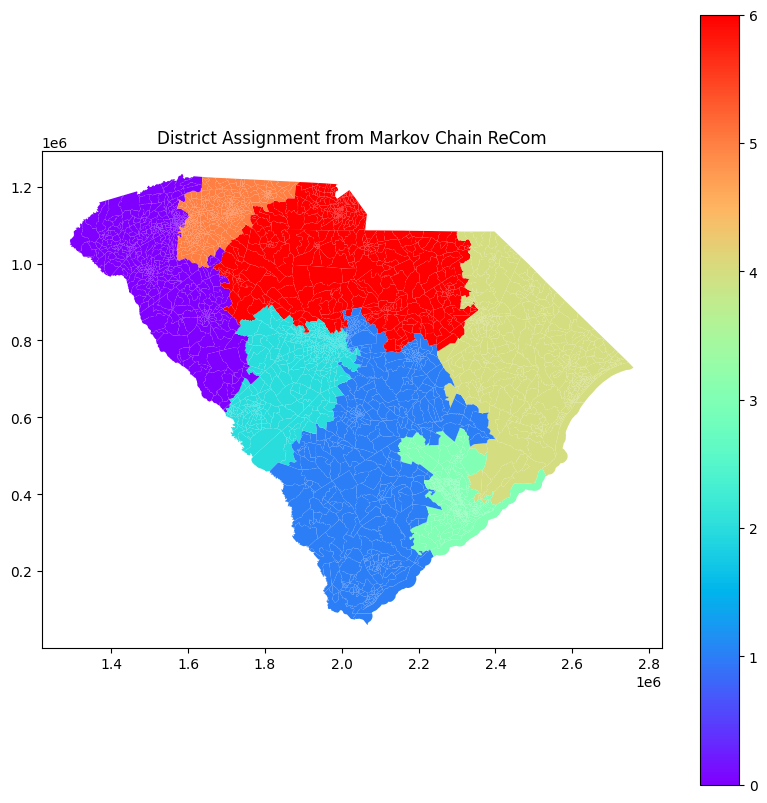

Map with Polsby-Popper metric 0.20029810315878643 found: 
Population in each district:
District
0    715160
1    711995
2    711700
3    712585
4    714035
5    714410
6    714350
Name: C_TOT22, dtype: int32


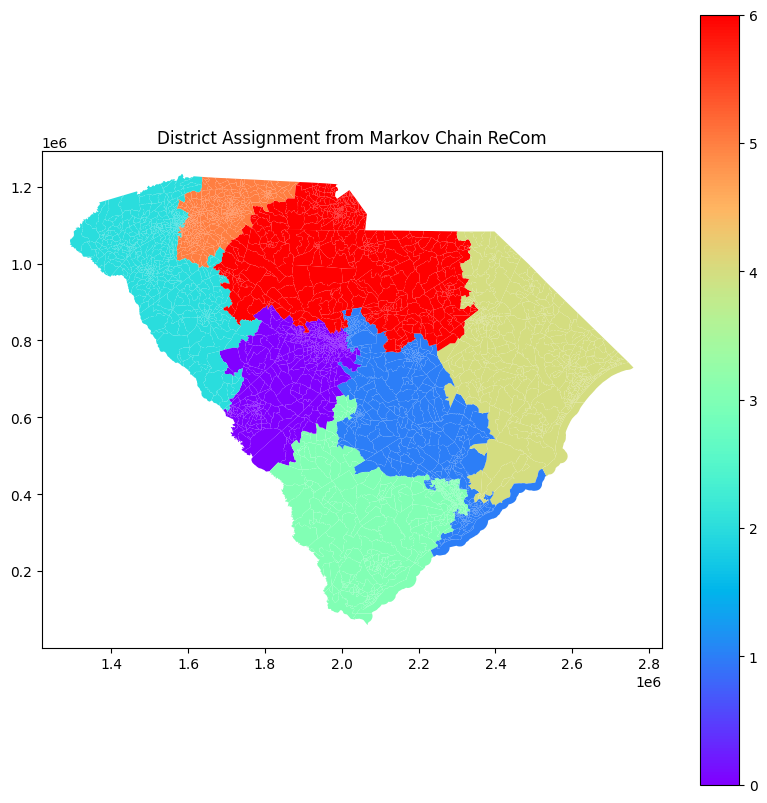

Dissolving maps...
Maps dissolved.


In [1]:
from fairymander.generator import DistrictGenerator

my_generator = DistrictGenerator("sc", 0.003, 100, 3, "compact")

"""
Running this will save as the following file structure in the current directory, creating the directory if it doesnt exist:

my_districts
    |
    |-testing_ga
        |
        |-testing_ga-0
        |-testing_ga-1
        |-testing_ga-2

Where the final "prefix-index" folders will have all the .shp related files
"""
districts = my_generator.run_and_save(directory="my_districts", file_prefix="sc_pp")

districts = my_generator.run() # note, now returns the maps dissolved

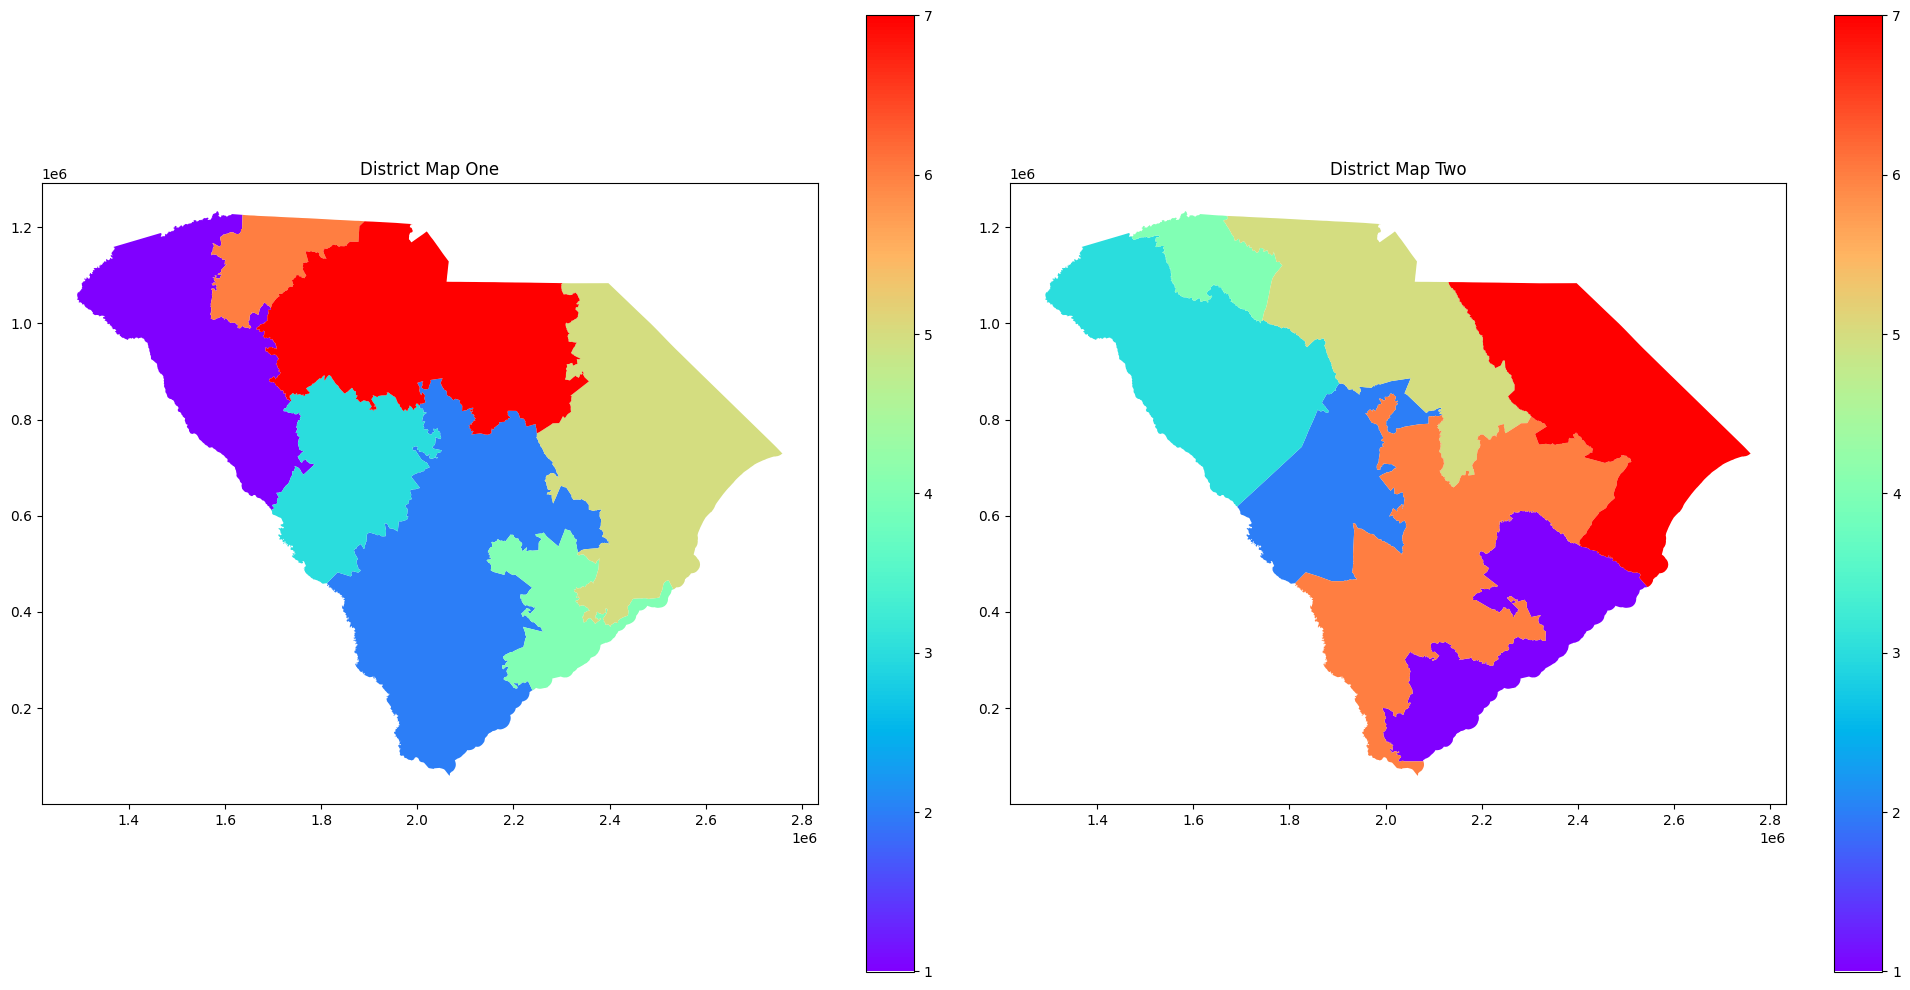

Running Fairness Comparison Analysis
------------------------------------
Average Polsby-Popper Score for Map 1: 0.20251366563095222
Average Polsby-Popper Score for Map 2: 0.21379405624889974
Map Two has a better Polsby-Popper score

Average Reock Score for Map 1: 0.4320984361414579
Average Reock Score for Map 2: 0.3893823223290802
Map One has a better Reock score

Efficiency Gap for Map 1: -20.11718756546218
Efficiency Gap for Map 2: 21.863583364240995
Map One has a better Efficiency Gap

Mean Median Difference, Map One: -1.2352575330798143
Mean Median Difference, Map Two: 2.659314795743384
Map One has a better Mean Median Difference

Lopsided Margin Score, Map One: -3.4993202782926005
Lopsided Margin Score, Map Two: 5.31729952134453
Map One has a better Lopsided Margin Score

Dissimilarity index, Hispanic, for Map One: 0.1001667369013208
Dissimilarity index, African American, for Map One: 0.13964066782469337
Dissimilarity index, East and South Asian, for Map One: 0.09013199471719875


(['Reock',
  'Efficiency Gap',
  'Mean Median Difference',
  'Lopsided Margin',
  'Dissimilarity Index: Hispanic',
  'Dissimilarity Index: African American',
  'Dissimilarity Index: East and South Asian'],
 ['Polsby-Popper',
  'Dissimilarity Index: Native American',
  'Dissimilarity Index: Other'],
 [])

In [9]:
from fairymander.data import get_curr_district_file
from fairymander.fairness import full_analysis, compare_maps
gdf = get_curr_district_file('sc')
compare_maps(districts[1], gdf)

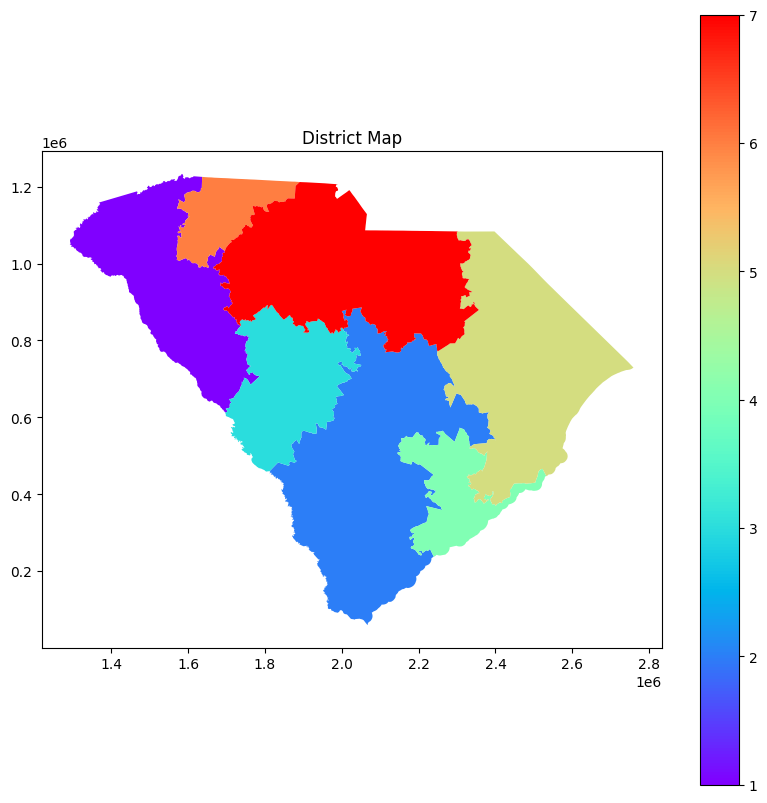

Running Fairness Analysis
-------------------------
Average Polsby-Popper Score: 0.20251366563095222

Average Reock Score: 0.4320984361414579

Efficiency Gap: -20.11718756546218

Mean Median Difference: -1.2352575330798143

Lopsided Margin Score: -3.4993202782926005

Dissimilarity index, Hispanic: 0.1001667369013208
Dissimilarity index, African American: 0.13964066782469337
Dissimilarity index, East and South Asian: 0.09013199471719875
Dissimilarity index, Native American: 0.14420168023447655
Dissimilarity index, Other: 0.09985349766345888



In [10]:
full_analysis(districts[1])

In [11]:
from fairymander.folium_converter import map_to_folium

res = map_to_folium('sc', districts[1])

res